In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
data = pd.read_csv("Tweets.csv")

# Exploring the data

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


# Understanding more about data using visualisation

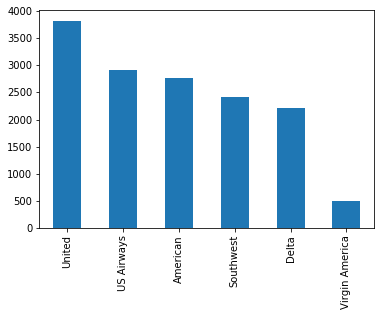

In [8]:
data.airline.value_counts().plot(kind='bar')

* Most of the flights are of United

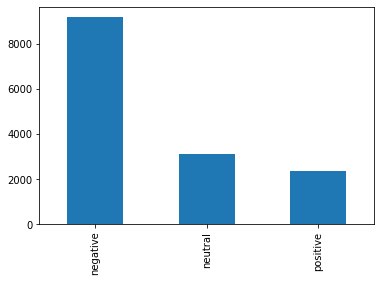

In [9]:
data.airline_sentiment.value_counts().plot(kind='bar')

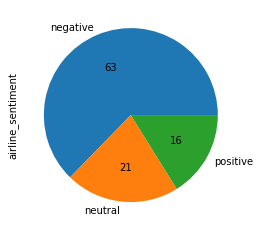

In [10]:
data.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f')

* 63% of the sentiments ar negative, 16% are positive and the rest all(21%) are neutral.

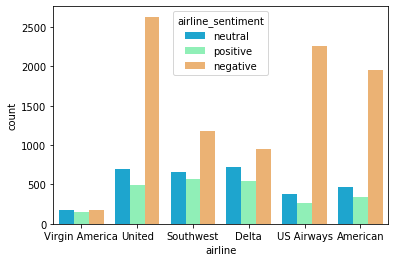

In [11]:
sns.countplot(x='airline',hue='airline_sentiment',data=data,palette='rainbow')

* United airlines have the most negative reviews followed by US Airways and American.

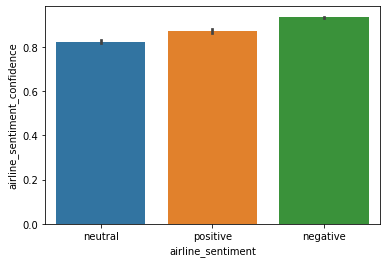

In [12]:
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=data)

* Confidence on the negative sentiment is highest followed by positive and neutral sentiments

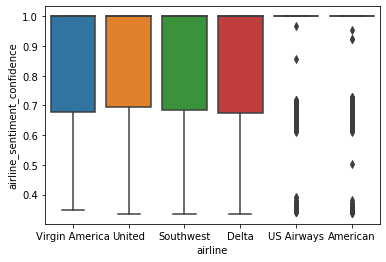

In [13]:
sns.boxplot(x='airline',y='airline_sentiment_confidence',data=data)

# Cleaning and preparing the data

In [14]:
comments = data.iloc[:,10].values
Labels = data.iloc[:,1].values

In [15]:
processed_Features = []

for sentence in range(len(comments)):
    #remove all the special character
    processed_Feature = re.sub(r'\W',' ',str(comments[sentence]))

    #remove all single characters
    processed_Feature = re.sub(r'\s+[a-zA-Z]\s+',' ',processed_Feature)

    #remove single characters from the start
    processed_Feature = re.sub(r'\^[a-zA-Z]\s+',' ',processed_Feature)

    #substituting multiple spaces with single space
    processed_Feature = re.sub(r'\s+',' ',processed_Feature,flags=re.I)

    #Removing prefixed 'b'
    processed_Feature = re.sub(r'^b\s+', ' ',processed_Feature)

    #converrting into lowercase
    processed_Feature = processed_Feature.lower()
    
    processed_Features.append(processed_Feature)

In [31]:
processed_Features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# TF-IDF

In [17]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_Features = vectorizer.fit_transform(processed_Features).toarray()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(processed_Features,Labels,test_size=0.2,random_state=0)

In [20]:
import sys
print(sys.version)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]


# Building the model

1. Support Vector Machine

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
clf = SVC(kernel='linear',random_state=0)
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
pred=clf.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [25]:
print(confusion_matrix(y_test,pred))

[[1697  129   44]
 [ 264  306   44]
 [ 107   56  281]]


In [26]:
print(accuracy_score(y_test,pred))

0.7800546448087432


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      1870
     neutral       0.62      0.50      0.55       614
    positive       0.76      0.63      0.69       444

    accuracy                           0.78      2928
   macro avg       0.74      0.68      0.70      2928
weighted avg       0.77      0.78      0.77      2928



* Neutral sentiments are hard to predict with good precision.
* Negative sentiments are predicted well.

2. AdaBoost Classification

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
clfr=AdaBoostClassifier(random_state=0)
clfr.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)

In [35]:
predictions=clfr.predict(x_test)

In [36]:
print(confusion_matrix(y_test,predictions))

[[1585  210   75]
 [ 313  247   54]
 [ 108   76  260]]


In [37]:
print(accuracy_score(y_test,predictions))

0.7144808743169399


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.79      0.85      0.82      1870
     neutral       0.46      0.40      0.43       614
    positive       0.67      0.59      0.62       444

    accuracy                           0.71      2928
   macro avg       0.64      0.61      0.62      2928
weighted avg       0.70      0.71      0.71      2928



Hence, SVM gives better accuracy (i.e 78%) for the given data.

3. Naive Bayes' classifier

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
predict = classifier.predict(x_test)

In [43]:
print(confusion_matrix(y_test,predict))

[[1823   40    7]
 [ 388  204   22]
 [ 213   38  193]]


In [44]:
print(accuracy_score(y_test,predict))

0.7581967213114754


In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.79      0.85      0.82      1870
     neutral       0.46      0.40      0.43       614
    positive       0.67      0.59      0.62       444

    accuracy                           0.71      2928
   macro avg       0.64      0.61      0.62      2928
weighted avg       0.70      0.71      0.71      2928



The Best accuracy achieved is 78% using SVM.